In [46]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [47]:
df = pd.read_csv("Titanic-dataset.csv")

In [48]:
#printing the first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
# how many rows & columns exist
df.shape

(891, 12)

In [50]:
# columns names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
# missing values per column
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [53]:
# columns containing missing values
df.columns[df.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

In [54]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
#"""---------------EXPLORATORY DATTA ANALYSIS-------------------"""

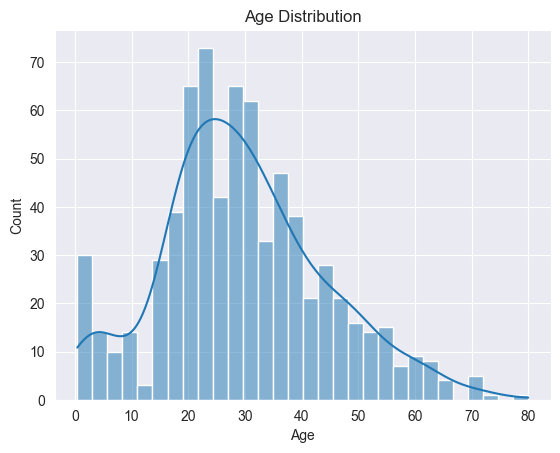

In [56]:
# Age Distribution: Skewness & Outliers (Univariate)
plt.figure()
sns.histplot((df["Age"]), bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

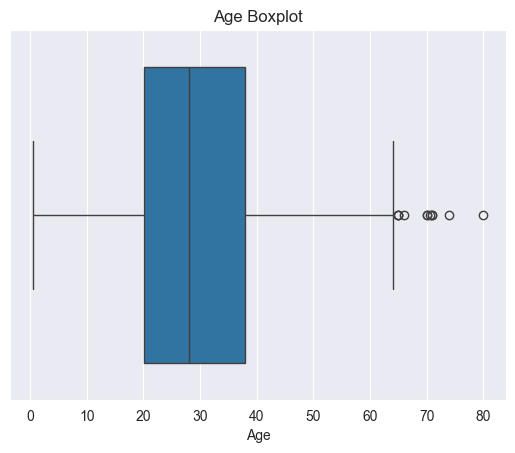

In [57]:
plt.figure()
sns.boxplot(x = df["Age"])
plt.title("Age Boxplot")
plt.show()

Age is slightly right-skewed(outliers)

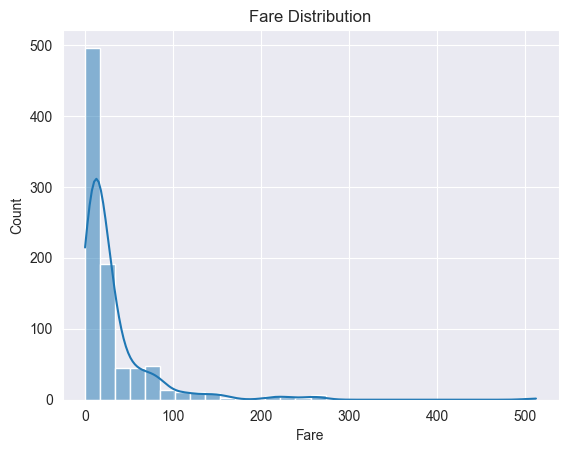

In [58]:
#Fare Distribution: Skewness & Extreme Values (univariate)
plt.figure()
sns.histplot(df["Fare"], bins=30, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

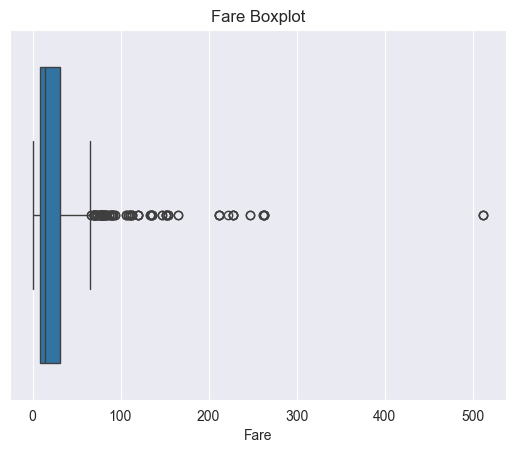

In [59]:
plt.figure()
sns.boxplot(x = df["Fare"])
plt.title("Fare Boxplot")
plt.show()

-Fare is heavily right-skewed
-Extreme high-value outliers

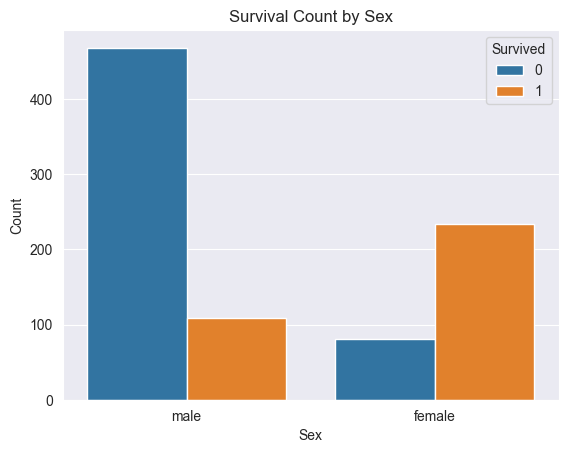

In [60]:
#Survival vs Sex: Who survived more? (Bivariate)
plt.figure()
sns.countplot(x = "Sex", hue = "Survived", data = df)
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

-Female survived far more than males

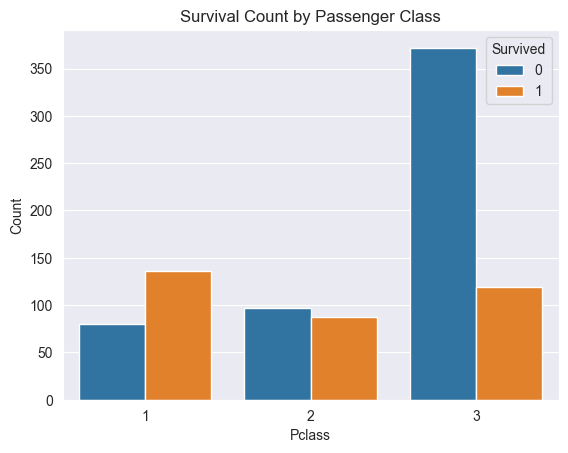

In [61]:
# Survival vs Pclass: which class Survived most?
plt.figure()
sns.countplot(x = "Pclass", hue = "Survived", data = df)
plt.title("Survival Count by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

-1st class had the highest survival rate, 3rd class had the lowest

In [62]:
  #-------------CLEANING--------------------
  # Drop the Cabin column
df = df.drop(columns = ["Cabin"])
# Check
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [64]:
# Impute Age with median
median_age = df["Age"].median()
#fill missing values
df["Age"] = df["Age"].fillna(median_age)
# check
df["Age"].isnull().sum()

np.int64(0)

In [65]:
# Impute Embarked with mode
mode_embarked = df["Embarked"].mode()[0]
# Fill missing values
df["Embarked"] = df["Embarked"].fillna(mode_embarked)
#check
df["Embarked"].isnull().sum()

np.int64(0)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [67]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


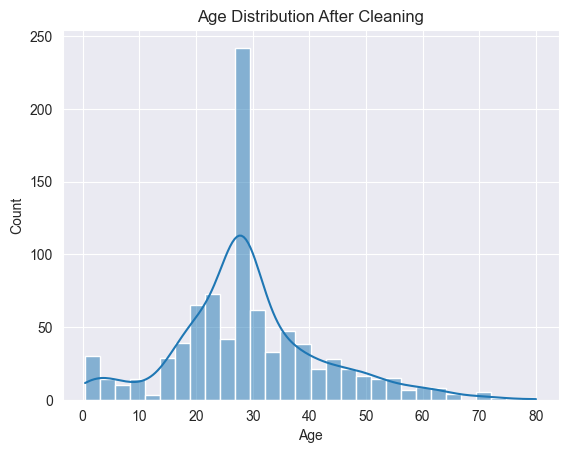

In [68]:
plt.figure()
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution After Cleaning")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

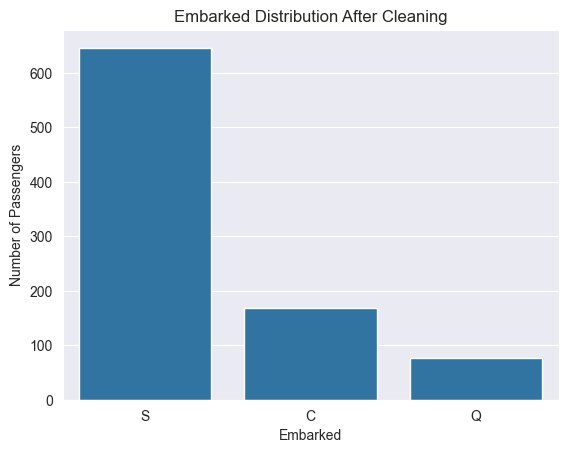

In [69]:
plt.figure()
sns.countplot(x = "Embarked",  data = df)
plt.title("Embarked Distribution After Cleaning")
plt.xlabel("Embarked")
plt.ylabel("Number of Passengers")
plt.show()

In [70]:
# save cleaned dataset
df.to_csv("titanic_cleaned.csv", index = False)